In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("imdb.json")
df_train = pd.read_json("imdb_train.json")
df_test = pd.read_json("imdb_test.json")

In [3]:
df.shape, df_train.shape, df_test.shape

((15613, 11), (14832, 11), (2342, 11))

In [4]:
df.head()

,text,IMDB_ID,genre,year,duration,titleType,primaryTitle,isAdult,runtimeMinutes,averageRating,numVotes
0,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"[Adventure, History]",1943,90,movie,The Count of Monte Cristo - Part 2: Retribution,0,90,7.0,80
1,Walt Disney präsentiert aus dem Frontier-Land:...,tt1041393,"[Action, Adventure, Comedy]",1960,51,tvEpisode,El Bandido,0,51,7.7,26
2,Walt Disney präsentiert aus dem Frontier-Land:...,tt1041444,"[Action, Adventure, Comedy]",1960,49,tvEpisode,"Adios, El Cuchillo",0,49,7.5,26
3,Gaslicht(1960) dTV- Bayerisches FS- 26. August...,tt1213061,[Thriller],1960,90,movie,Gaslicht,0,90,8.2,30
4,Walt Disney präsentiert aus dem Frontier-Land:...,tt1041392,"[Action, Adventure, Comedy]",1961,49,tvEpisode,Auld Acquaintance,0,49,7.7,31


In [5]:
# query = 'titleType == "tvEpisode"'
#
# df = df.query(query)
# df_train = df_train.query(query)
# df_test = df_test.query(query)

#### Sample datasets for faster training and inference

In [6]:
df_sample = df.sample(frac=0.1, random_state=42)
df_train_sample = df_train.sample(frac=0.1, random_state=42)
df_test_sample = df_test.sample(frac=0.1, random_state=42)
df_sample.shape, df_train_sample.shape, df_test_sample.shape

((1561, 11), (1483, 11), (234, 11))

### Check distribution of movies and tv episodes

<AxesSubplot:>

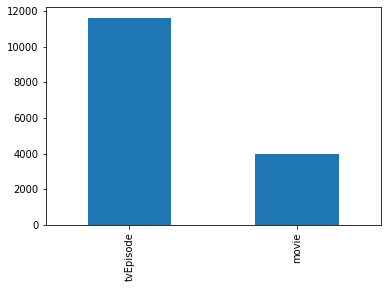

In [7]:
df.titleType.value_counts().plot.bar()

<AxesSubplot:>

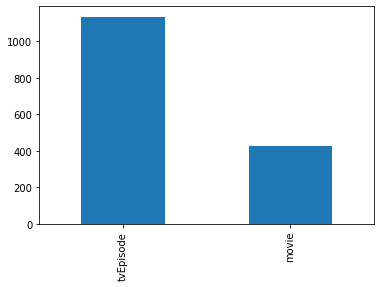

In [8]:
df_sample.titleType.value_counts().plot.bar()

### Check regression target: Average Rating

<AxesSubplot:ylabel='Frequency'>

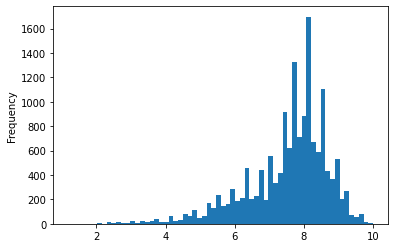

In [9]:
df.averageRating.plot.hist(bins=64)

<AxesSubplot:ylabel='Frequency'>

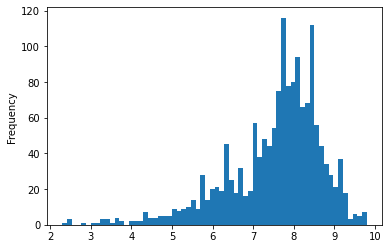

In [10]:
df_sample.averageRating.plot.hist(bins=64)

titleType
movie        AxesSubplot(0.125,0.125;0.775x0.755)
tvEpisode    AxesSubplot(0.125,0.125;0.775x0.755)
Name: averageRating, dtype: object

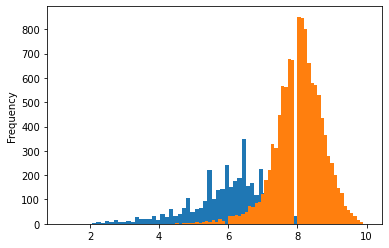

In [11]:
df.groupby("titleType").averageRating.plot.hist(bins=64)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=10000)

X_train = tfidf_vec.fit_transform(df_train_sample.text)
X_test = tfidf_vec.transform(df_test_sample.text)

In [13]:
yreg_train = df_train_sample.averageRating.to_numpy()
yreg_test = df_test_sample.averageRating.to_numpy()

In [14]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

regressor = SVR(kernel="rbf")

regressor.fit(X_train, yreg_train)

SVR()

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error

yreg_pred = regressor.predict(X_test)

print(f"R2-Score: {r2_score(yreg_test, yreg_pred)}")
print(f"Mean absolute error: {mean_absolute_error(yreg_test, yreg_pred)}")

R2-Score: 0.3368228823276046
Mean absolute error: 0.6157250007751246


In [16]:
df_test_sample.iloc[np.argmax(np.abs(yreg_test - yreg_pred))]

text              - Hallo? - Tracey, hier ist Bradley. Bradley, ...
IMDB_ID                                                   tt3138104
genre                                                      [Comedy]
year                                                           2014
duration                                                         85
titleType                                                     movie
primaryTitle                                     The Hungover Games
isAdult                                                           0
runtimeMinutes                                                   85
averageRating                                                   3.6
numVotes                                                      10790
Name: 810, dtype: object

In [17]:
only_movies_mask = df_test_sample.titleType == "movie"

In [18]:
print(
    f"Only movies: R2-Score: {r2_score(yreg_test[only_movies_mask], yreg_pred[only_movies_mask])}"
)
print(
    f"Only movies: Mean absolute error: {mean_absolute_error(yreg_test[only_movies_mask], yreg_pred[only_movies_mask])}"
)

Only movies: R2-Score: -0.6788636112475936
Only movies: Mean absolute error: 0.9923036023635103


In [19]:
only_tv_episodes_mask = df_test_sample.titleType == "tvEpisode"

In [20]:
print(
    f"Only tvEpisodes: R2-Score: {r2_score(yreg_test[only_tv_episodes_mask], yreg_pred[only_tv_episodes_mask])}"
)
print(
    f"Only tvEpisodes: Mean absolute error: {mean_absolute_error(yreg_test[only_tv_episodes_mask], yreg_pred[only_tv_episodes_mask])}"
)

Only tvEpisodes: R2-Score: 0.1049805062940311
Only tvEpisodes: Mean absolute error: 0.49162523434258837
